# <center>Static and dynamic optimizations 2023-2024</center>

## <center>OPTIQUEST contest assignment</center>



# <span style="color:red">Problem </span> 

### Suppose a toy firm has a production function $Q(x, y) = 5*x^{1/2}*y^2$, where <span style="color:red">x</span> is labour and <span style="color:red">y</span> is equipment. The firm has 100 thousand euros of budget total to spend for labour and equipment. The labour market has a limited offer up to 40 workers who will be paid 1 thousand euors to each one.

### Find the optimal proportion of labour (x) and equipment (y) in order to achieve the maximum value of production.

# <span style="color:green">Mathematical interpretation of the problem</span>

\begin{align}
max \ && Q(x, y) = 5*x^{1/2}*y^2 \\
subject \ to \ && x + y = 10 \\
&& x \leq 4
\end{align}

# <span style="color:green">Solution</span>

In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Objective function to maximize in canonical form
def objective_function(vars):
    return -5 * (vars[0]**0.5) * (vars[1]**2) # Negative of the function to maximize

In [3]:
# Objective function to maximize in canonical form
def objective_function1(vars):
    c_2 = [5, 6, 7, 8, 9, 10]
    list_1 = []
    for i in c_2:
        f_1 = -i * (vars[0]**0.5) * (vars[1]**2)
        list_1.append(f_1)
    return list_1  # Negative of the function to maximize

In [4]:
# Constraint function for x + y - c_1 = 0
def constraint_eq_factory(c_1):
    return {'type': 'eq', 'fun': lambda vars: vars[0] + vars[1] - c_1}

In [5]:
# Constraint 2: x <= 4
def constraint2(vars):
    return 4 - vars[0]  # Constraint x <= 4

In [6]:
# Constraint 4: x >= 0
def constraint3(vars):
    return vars[0]  # Constraint x >= 0

In [7]:
# Constraint 4: y >= 0
def constraint4(vars):
    return vars[1]  # Constraint y >= 0

In [8]:
c_1_values = np.arange(10, 21)
results = []

In [9]:
for c_1 in c_1_values:
    constraints = [
        constraint_eq_factory(c_1),
        {'type': 'ineq', 'fun': constraint2},
        {'type': 'ineq', 'fun': constraint3},
        {'type': 'ineq', 'fun': constraint4},
    ]
    result = minimize(objective_function, x0=[1, 1], constraints=constraints)
    results.append((c_1, result))

C:\Users\u.nurmatov\AppData\Local\Temp\ipykernel_20960\847309417.py:3: RuntimeWarning: invalid value encountered in scalar power
  return -5 * (vars[0]**0.5) * (vars[1]**2) # Negative of the function to maximize


In [10]:
# Print the result
for c_1, res in results:
    if res.success:
        print("Optimal solution found for c_1 = {c_1}:")
        print(f"The optimal value of the labour, x = {res.x[0]:.2f}")
        print(f"The optimal value of the equipment, y = {res.x[1]:.2f}")
        print(f"Maximum value of the objective function:, {-res.fun:.4f}")
    else:
        print("Optimization failed for c_1 = {c_1}: ", res.message)

Optimal solution found for c_1 = {c_1}:
The optimal value of the labour, x = 2.00
The optimal value of the equipment, y = 8.00
Maximum value of the objective function:, 452.5483
Optimal solution found for c_1 = {c_1}:
The optimal value of the labour, x = 2.20
The optimal value of the equipment, y = 8.80
Maximum value of the objective function:, 574.3104
Optimal solution found for c_1 = {c_1}:
The optimal value of the labour, x = 2.40
The optimal value of the equipment, y = 9.60
Maximum value of the objective function:, 713.8683
Optimization failed for c_1 = {c_1}:  Singular matrix E in LSQ subproblem
Optimal solution found for c_1 = {c_1}:
The optimal value of the labour, x = 2.80
The optimal value of the equipment, y = 11.20
Maximum value of the objective function:, 1049.5063
Optimal solution found for c_1 = {c_1}:
The optimal value of the labour, x = 3.00
The optimal value of the equipment, y = 12.00
Maximum value of the objective function:, 1247.0766
Optimal solution found for c_1 =

# <span style="color:green">Geometric interpretation of the problem</span>

In [ ]:


plt.rcParams['figure.figsize'] = [11, 11]
plt.rcParams['figure.dpi'] = 40
plt.rcParams.update({'font.size': 25})


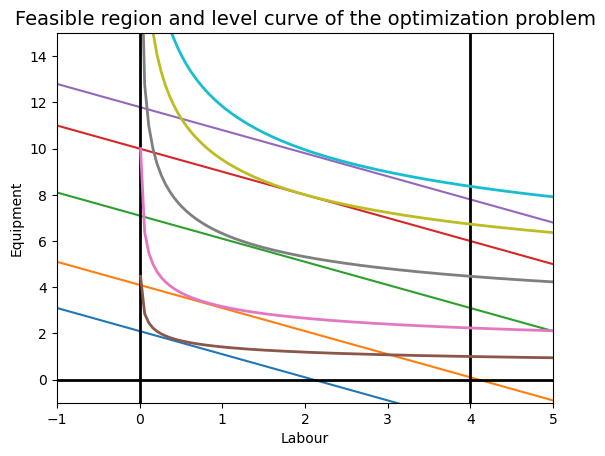

In [32]:

plt.title("Feasible region and level curve of the optimization problem", fontsize=14)


x = np.linspace(-4, 15, 200)
y = 10 - x

b = [2.1, 4.1, 7.1, 10, 11.8]
for i in b:
    y = i - x
    plt.plot(x, y)

plt.axvline(x=0, c="black", label="x=0", linewidth=2.0)
plt.axhline(y=0, c="black", label="y=0", linewidth=2.0)

plt.axvline(x = 4, color = 'black', label = 'axvline - full height', linewidth=2.0)

plt.xlabel("Labour")
plt.ylabel("Equipment")


def y_1(x_1, c):
    for i in c:
        y_1 = (i/(5*(x_1**0.5)))**0.5
        o_f = plt.plot(x_1, y_1, linewidth=2.0)
    return o_f

x_1 = np.linspace(0.01, 15, 300)
c = [10, 50, 200, 453, 700]

y_1(x_1, c)

plt.ylim((-1, 15))
plt.xlim((-1, 5))

plt.show()
